# Problem Set 5

See [Introduction](https://datascience.quantecon.org/../pandas/intro.html) and [Basic Functionality](https://datascience.quantecon.org/../pandas/basics.html)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## Setup

These questions use data on daily Covid cases in health regions in Canada from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada).

In [3]:
url = "https://github.com/ccodwg/Covid19Canada/raw/master/timeseries_hr/cases_timeseries_hr.csv"
try : # only download if cases_raw has not already been defined 
    cases_raw
except:
    cases_raw = pd.read_csv(url, parse_dates=["date_report"])

try :
    hr_map 
except: 
    hr_map = pd.read_csv("https://github.com/ccodwg/Covid19Canada/raw/master/other/hr_map.csv")

Now, we create cases per 100,000 and then do the same manipulation as in the pandas basics lecture. We will focus on BC health regions in this problem set.

In [4]:
cases_raw

,province,health_region,date_report,cases,cumulative_cases
0,Alberta,Calgary,2020-01-25,0,0
1,Alberta,Calgary,2020-01-26,0,0
2,Alberta,Calgary,2020-01-27,0,0
3,Alberta,Calgary,2020-01-28,0,0
4,Alberta,Calgary,2020-01-29,0,0
...,...,...,...,...,...
84655,Yukon,Yukon,2022-04-29,9,4196
84656,Yukon,Yukon,2022-04-30,0,4196
84657,Yukon,Yukon,2022-01-05,0,4196
84658,Yukon,Yukon,2022-02-05,21,4217


In [5]:
cases_bc = cases_raw.loc[(cases_raw['province'] == 'BC') &  
                         (cases_raw['date_report'] < pd.to_datetime('2022-01-01')) &
                         (cases_raw['date_report'] >= pd.to_datetime('2021-01-01')),:] # Take the data for BC in year 2021 only
# create cases per 100,000
cases_bc = cases_bc.merge(hr_map[['province','health_region','pop']],
                          on=['province','health_region'],
                          how='left')
cases_bc['cases100k'] = cases_bc['cases'] / cases_bc['pop'] * 100_000
cases_bc = ( 
    cases_bc.reset_index()
    .pivot_table(index='date_report',columns='health_region', values='cases100k')
)    
cases_bc

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


The resulting `cases_bc` DataFrame contains Covid cases per 100,000 population for each BC health region and day, in 2021.

## Question 1

At each date, what is the minimum number of cases per 100,000 across health regions?

In [7]:
# Your code here
cases_bc.agg(min, axis=1)
#cases_bc.agg(min, axis=1).plot()

date_report
2021-01-01     0.000000
2021-01-02     9.101332
2021-01-03     9.935222
2021-01-04     6.500952
2021-01-05     0.000000
                ...    
2021-12-27    17.781177
2021-12-28    13.755250
2021-12-29    33.213897
2021-12-30    40.930258
2021-12-31    39.740889
Length: 365, dtype: float64

What was the (daily) median number of cases per 100,000 in each health region?

In [12]:
# Your code here
cases_bc.agg(np.median, axis=0)

health_region
Fraser               8.567287
Interior             6.582085
Island               2.482181
Northern             8.051854
Vancouver Coastal    5.576348
dtype: float64

What was the maximum number of cases per 100,000 across health regions? In what health region did it happen? On what date was this achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [13]:
# Your code here
cases_bc.agg(max)

health_region
Fraser               121.886737
Interior             104.071454
Island                54.371594
Northern             136.210529
Vancouver Coastal     80.119006
dtype: float64

In [14]:
cases_bc.idxmax()

health_region
Fraser              2021-12-30
Interior            2021-07-09
Island              2021-12-30
Northern            2021-10-18
Vancouver Coastal   2021-12-30
dtype: datetime64[ns]

- maximum number of cases of 121.886737 was achieved at Fraser on 2021-12-30
- maximum number of cases of 104.071454 was achieved at Interior on 2021-07-09
- maximum number of cases of 54.371594 was achieved at Island on 2021-12-30
- maximum number of cases of 136.210529 was achieved at Northern on 2021-10-18
- maximum number of cases of 80.119006 was achieved at Vancouver Coastal on 2021-12-30

Classify each health region as high or low volatility based on whether the variance of their cases per 100,000 is above or below 100.

In [15]:
# Your code here
def classifyvar(x, benchmark=100):
    if (x > benchmark) :
        return("high") 
    else :
        return("low")

cases_bc.var().apply(classifyvar)

health_region
Fraser               high
Interior             high
Island                low
Northern             high
Vancouver Coastal    high
dtype: object

## Question 2

Imagine that we want to determine whether cases per 100,000 was High (> 10),
Low (0 < x <= 10), or None (x = 0) for each health region and each day.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is High, Low, or None.

In [16]:
# Your code here
def classifycases(x):
    if (x > 10):
        return("High")
    elif (x > 0):
        return("Low")
    else:
        return("None")   

Pass your function to either `apply` or `applymap` and save the result in a new DataFrame called `case_bins`.

In [17]:
# Your code here
case_bins=cases_bc.applymap(classifycases)
print(case_bins)

health_region Fraser Interior Island Northern Vancouver Coastal
date_report                                                    
2021-01-01      None     None   None     None              None
2021-01-02      High     High    Low     High              High
2021-01-03      High      Low   High     High              High
2021-01-04      High      Low    Low     High              High
2021-01-05      None     None   None     None              None
...              ...      ...    ...      ...               ...
2021-12-27      High     High   High     High              High
2021-12-28      High     High   High     High              High
2021-12-29      High     High   High     High              High
2021-12-30      High     High   High     High              High
2021-12-31      High     High   High     High              High

[365 rows x 5 columns]


## Question 3

This exercise has multiple parts:

Use another transformation on `case_bins` to count how many times each health region had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: `value_counts`

In [18]:
# Your code here
case_bins1 = case_bins.apply(pd.value_counts).loc[['None','Low','High'],:]
print(case_bins1)

health_region  Fraser  Interior  Island  Northern  Vancouver Coastal
None              110       113     113       119                111
Low                84       108     194        75                137
High              171       144      58       171                117


Construct a horizontal bar chart (you can refer to an example of horizontal bar chart [here](https://www150.statcan.gc.ca/edu/power-pouvoir/c-g/c-g05-2-3-eng.png)) to detail the occurrences of each level.
Use one bar per health region and classification for 15 total bars.

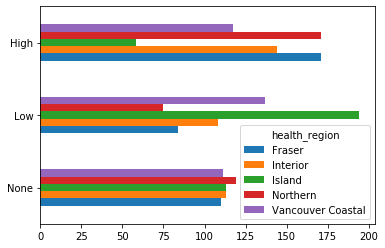

In [19]:
# Your code here
case_bins1.plot(kind="barh")

## Question 4

For a single health region of your choice, determine the mean
cases per 100,000 during “High” and “Low” case times.
(recall your `case_bins` DataFrame from the exercise above)

In [20]:
# Your code here
cases_bins = cases_bc.applymap(classifycases)
region = 'Vancouver Coastal'
for level in ['High', 'Low'] :
    print(f"Average cases in {region} when cases are {level} are {cases_bc.loc[cases_bins[region]==level,region].mean()}")

Average cases in Vancouver Coastal when cases are High are 23.868397280368058
Average cases in Vancouver Coastal when cases are Low are 5.25431369097927


Which health regions in our sample performs the best during “bad times" ? To
determine this, compute each health region’s mean daily cases per 100,000 where the daily cases per 100,000 is greater than 10 (i.e., in the "high"
category as defined above).

In [21]:
# Your code here
for region in ['Fraser',  'Interior',  'Island',  'Northern',  'Vancouver Coastal'] :
    print(f" mean daily cases in {region} during bad times are {cases_bc.loc[cases_bins[region] =='High',region].mean()}")

# or
case_bins2 = cases_bc.apply(lambda x: x[x>10].mean()) 
print(case_bins2)

 mean daily cases in Fraser during bad times are 25.834643784274338
 mean daily cases in Interior during bad times are 25.33222969571726
 mean daily cases in Island during bad times are 20.9212439275203
 mean daily cases in Northern during bad times are 31.457949820626528
 mean daily cases in Vancouver Coastal during bad times are 23.868397280368058
health_region
Fraser               25.834644
Interior             25.332230
Island               20.921244
Northern             31.457950
Vancouver Coastal    23.868397
dtype: float64


Island Health peforms the best during bad times. Its average cases during bad times is 20.921244, smallest among all health regions